# Worksheet 10

Exploring bias using simulated data.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV as LogReg
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import seaborn as sns

The following function samples data from a distribution of two different populations with sensitive attributes $A=0$ and $A=1$.  It returns $(X,y)$, where the second column of $X$ corresponds to the sensitive attributes. So, `X[:,1]==0` corresponds to samples with $A=0$, and `X[:,1]==1` corresponds to samples with $A=1$.

In [2]:
#@title The function, `get_data(n1,n2)` samples data points from a distributions of two different populations ( $𝐴=0,𝐴=1$ ) and returns positive and negative samples from both, outputting $(X,y)$.

def get_data(n1,n2):
    
    # Function that returns n1 and n2 samples from two different populations 
    # given by A=1, A=0, for both positive and negative labels. The features are
    # 1-dimensional, plus the binary label for the sensitive attribute

    mu1 = .5
    delta = .5
    nu = 1.5
    
    X1p = np.random.randn(n1,)+mu1
    X1n = np.random.randn(n1,)-mu1

    X2p = np.random.randn(n2,)+mu1-delta
    X2n = nu*np.random.randn(n2,)-mu1-delta/1.5

    X_data = np.concatenate((X1p,X1n,X2p,X2n),axis=0)
    y = np.zeros(len(X_data))
    y[0:n1] = 1
    y[2*n1:2*n1+n2] = 1
    A = np.ones((n1*2+n2*2))
    A[0:2*n1] = 0
    X = np.array([X_data,A]).T
    
    return (X,y)

1. Create `X_train` and `y_train` by using `get_data(n1,n2)`.  Create `X_test` and `y_test` by again using `get_data(n1,n2)`.  Use `n1=500` and `n_2=500`.

In [3]:
X_train,y_train = get_data(500, 500)
X_test,y_test = get_data(500, 500)


Train a logistic regression model. Assess the accuracy using `.score()` method using `X_test` and `y_test`.

In [4]:
model = LogReg()
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.669

Plot the ROC curve using `roc_curve()`

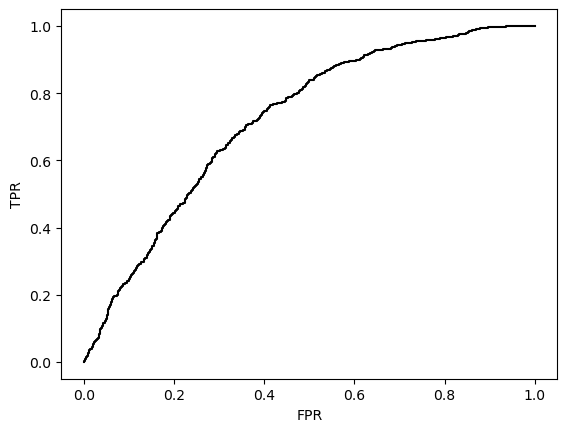

In [5]:
y_pred = model.predict_proba(X_test)[:,1]
fpr,tpr,thres = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,'k')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

2. The second feature of the data matrix  X  corresponds to a sensitive attribute, which codes for two populations (e.g. males/females, white/non-white). Is the distribution of the features (first column in  X ) the same for both populations? Plot histrograms of `X_test[:,0]` for `X_test[:,1]==0` and `X_test[:,1]==1` using your preferred tool.

<AxesSubplot:xlabel='B', ylabel='Count'>

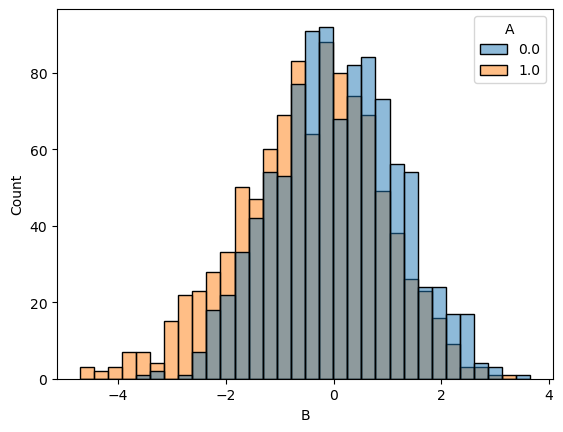

In [6]:
df = pd.DataFrame(X_test, columns = ['B','A'])

sns.histplot(data=df, x="B", hue="A")


3. How does the classifier perform in each of these? Plot the ROC curve for each population (see above for syntax), and compute the TPR for each population in `X_test` `y_test` for the trained classifier from before.

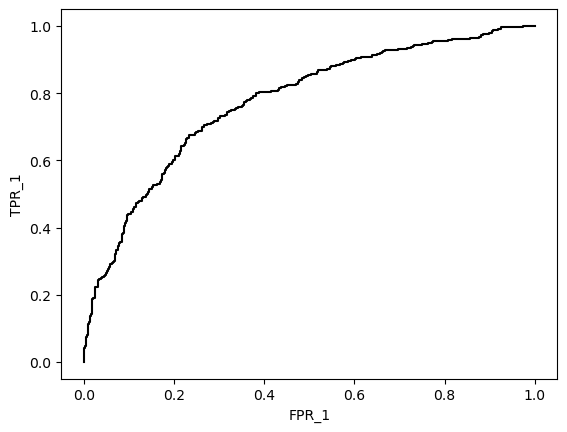

In [7]:
y_pred = model.predict_proba(X_test)[:,1]
fpr_1,tpr_1,thres_1 = roc_curve(y_test[X_test[:,1]==0], y_pred[X_test[:,1]==0])
plt.plot(fpr_1,tpr_1,'k')
plt.ylabel('TPR_1')
plt.xlabel('FPR_1')
plt.show()

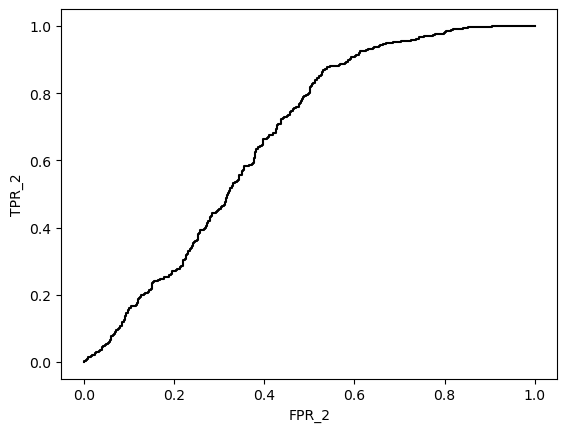

In [8]:
y_pred = model.predict_proba(X_test)[:,1]
fpr_2,tpr_2,thres_2 = roc_curve(y_test[X_test[:,1]==1], y_pred[X_test[:,1]==1])
plt.plot(fpr_2,tpr_2,'k')
plt.ylabel('TPR_2')
plt.xlabel('FPR_2')
plt.show()

4. Plot the TPR for each population vs the threshold; i.e., plot `thres_1` vs `tpr_1`.  For which threshold(s) should you use if you want to achieve Equal Opportunity with a TPR of 80%? 

threshold for [A=0]   = 0.4554016034383398


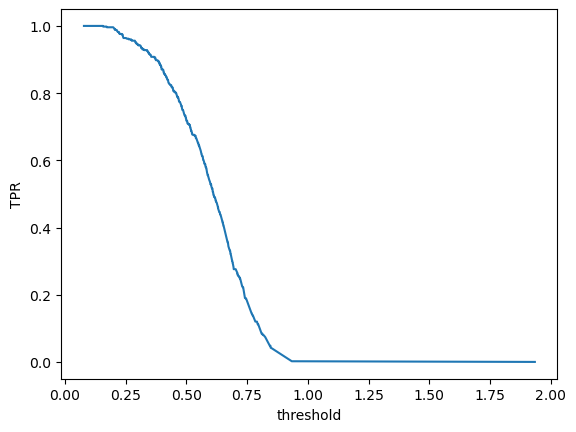

In [9]:
plt.plot(thres_1,tpr_1)
print('threshold for [A=0]   =',thres_1[tpr_1>0.8][0])
plt.xlabel('threshold')
plt.ylabel('TPR')
plt.show()

threshold for [A=0]   = 0.4167759288553362


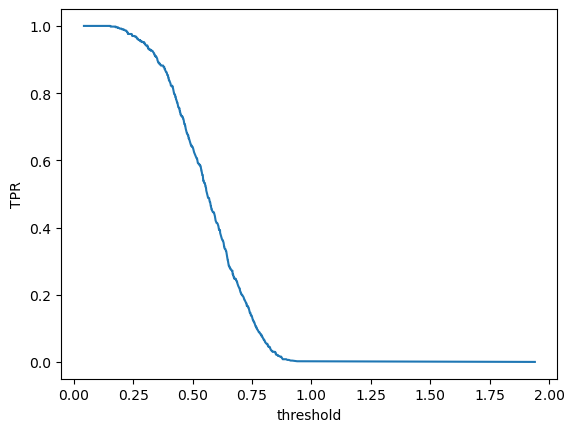

In [10]:
plt.plot(thres_2,tpr_2)
print('threshold for [A=0]   =',thres_2[tpr_2>0.8][0])
plt.xlabel('threshold')
plt.ylabel('TPR')
plt.show()

5. **Reflection** What do you need to do to get Equal Opportunity? (Answer here)

**Answer** You need to find the intersection of the ROC curves.

In [11]:
# You need to find the intersection of the ROC curves.
